In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [178]:
df = pd.read_csv('../datas/emprego.csv')
df.head()
df.count()

sl_no             215
gender            215
ssc_p             215
ssc_b             215
hsc_p             215
hsc_b             215
hsc_s             215
degree_p          215
degree_t          215
workex            215
etest_p           215
specialisation    215
mba_p             215
status            215
salary            148
dtype: int64

In [179]:
x = df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
y = df['status']

scaler = MinMaxScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [181]:
from sklearn.neural_network import MLPClassifier

In [182]:
modelo = MLPClassifier(
    hidden_layer_sizes=(5, 5, 5, 5),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=1000,
    shuffle=True,
    random_state=20,
    validation_fraction=0.2,
    verbose=True)

In [183]:
modelo.fit(X_train, y_train)

Iteration 1, loss = 0.62168029
Iteration 2, loss = 0.62082812
Iteration 3, loss = 0.61998234
Iteration 4, loss = 0.61915277
Iteration 5, loss = 0.61833807
Iteration 6, loss = 0.61753904
Iteration 7, loss = 0.61675165
Iteration 8, loss = 0.61597884
Iteration 9, loss = 0.61522343
Iteration 10, loss = 0.61448226
Iteration 11, loss = 0.61375427
Iteration 12, loss = 0.61303914
Iteration 13, loss = 0.61233565
Iteration 14, loss = 0.61164218
Iteration 15, loss = 0.61096096
Iteration 16, loss = 0.61029482
Iteration 17, loss = 0.60964915
Iteration 18, loss = 0.60901855
Iteration 19, loss = 0.60840002
Iteration 20, loss = 0.60779424
Iteration 21, loss = 0.60720320
Iteration 22, loss = 0.60662538
Iteration 23, loss = 0.60606079
Iteration 24, loss = 0.60550809
Iteration 25, loss = 0.60496807
Iteration 26, loss = 0.60443902
Iteration 27, loss = 0.60392036
Iteration 28, loss = 0.60341485
Iteration 29, loss = 0.60292068
Iteration 30, loss = 0.60243445
Iteration 31, loss = 0.60196146
Iteration 32, los

C:\Users\Igor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), max_iter=1000, random_state=20,
              validation_fraction=0.2, verbose=True)

Text(0, 0.5, 'Loss')

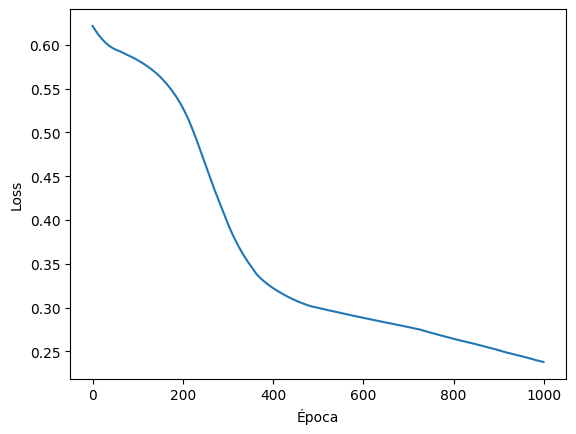

In [184]:
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

In [185]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print(confusion_matrix(y_train,predicao))
print(classification_report(y_train,predicao))

Dados de treinamento
[[40  4]
 [ 9 97]]
              precision    recall  f1-score   support

  Not Placed       0.82      0.91      0.86        44
      Placed       0.96      0.92      0.94       106

    accuracy                           0.91       150
   macro avg       0.89      0.91      0.90       150
weighted avg       0.92      0.91      0.91       150



In [186]:
print('Dados de teste')

predicao = modelo.predict(X_test)

print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

Dados de teste
[[16  7]
 [ 6 36]]
              precision    recall  f1-score   support

  Not Placed       0.73      0.70      0.71        23
      Placed       0.84      0.86      0.85        42

    accuracy                           0.80        65
   macro avg       0.78      0.78      0.78        65
weighted avg       0.80      0.80      0.80        65

